In [1]:
from pandas import DataFrame
from numpy import max , array , exp , insert , delete , log
from matplotlib.pyplot import savefig
from random import random , shuffle
from time import time , sleep

In [2]:
class Cut : 
  # setters
  def __cost_function ( self ) :
    cost = 0
    cur_sheet_size = self.__standard_size
    for i in self.__order :
      if i > cur_sheet_size : 
        cost += cur_sheet_size
        cur_sheet_size = self.__standard_size
      cur_sheet_size -= i
    cost += cur_sheet_size
    return cost

  # __init__
  def __init__( self , order , standard_size ) :
    self.__order = array(order)
    self.__standard_size = standard_size
    self.__cost = self.__number_of_stock
  
  # getters
  @property
  def cost ( self ) :
    return self.__cost
  @property
  def __number_of_stock ( self ) :
    nstock = 1
    cur_sheet_size = self.__standard_size
    for i in self.__order :
      if i > cur_sheet_size : 
        nstock += 1
        cur_sheet_size = self.__standard_size
      cur_sheet_size -= i
    return nstock

  # magic methods
  def __str__ ( self ) :
    return str( self.__order )
    
  def equal ( self , other ) :
    return self.__order.shape == other.__order.shape and (self.__order == other.__order).all() 

  # operator overloading  
  def __lt__ ( self , other ) :
    return self.cost > other.cost
  def __eq__ ( self , other ) :
    return self.cost == other.cost
  def __le__ ( self , other ) :
    return self.cost >= other.cost
  def __ge__ ( self , other ) :
    return self.cost <= other.cost
  def __gt__ ( self , other ) :
    return self.cost < other.cost
  
  # methods
  def copy ( self ) :
    return Cut( self.__order.copy() , self.__standard_size )
  
  def neighbours ( self ) :
    order = list(self.__order)

    return tuple( Cut( order[:i] + order[ i + 1 : j ] + [order[i]]  + order[j:] , self.__standard_size ) for j in range(len ( order )) for i in range(j) ) + tuple (Cut( order[:j] + [ order[i] ] + order[ j : i ] + order[ i + 1 : ] , self.__standard_size ) for i in range(len ( order )) for j in range(i) )

In [3]:
# simulated annealing algorithm
def simulated_annealing ( initial_temp , temp_length , initial_cooling_rate , initial_solutions , cooling_rate_step , temp_length_step ) :
  cooling_rate = initial_cooling_rate
  temp = initial_temp
  runing = True
  cur_solutions = initial_solutions
  best = max( initial_solutions )
  costs = [ [ temp / 5 , best.cost] ]
  print( "initial best cost is" , best.cost)
  n = 0
  while runing :
    new_solutions = []
    for solution in cur_solutions :
      better_neighbour , neighbours = False , solution.neighbours()
      for neighbour in neighbours :
        if neighbour > solution :
          solution , better_neighbour = neighbour , True
        else :
          if (not better_neighbour) and random() < exp( ( solution.cost - neighbour.cost ) / temp ) :
            solution = neighbour
      new_solutions.append( solution )
    cur_solutions  = array(new_solutions)
    new_best = max( cur_solutions )
    costs.append( [ temp / 5 , new_best.cost ] )
    if new_best.cost == best.cost :
        if temp < 1 :
          runing = False
    elif new_best > best :
      best , n = new_best , 0
    n += 1
    if n >= temp_length :
      temp , cooling_rate , temp_length , n = temp * cooling_rate , cooling_rate * cooling_rate_step , temp_length * temp_length_step , 0
    print( "new best cost is" , new_best.cost)
    print( "total best cost is" , best.cost)
    print( " log temp is" , temp)
  return DataFrame(costs ,  columns=["log(temp)","cost"]), best

We write the create_initial_solutions function in general state but in this situation we found out we can use a single initial solution.

In [4]:
def create_initial_solutions ( requests , standard_size ,n = None ) :
  if n is None :
    n = len(requests)
  solutions = [ requests.copy() for _ in range(n)]
  for i in solutions :
    shuffle(i)
  return array([Cut( i , standard_size ) for i in solutions ])

initial best cost is 61
new best cost is 59
total best cost is 59
 log temp is 700
new best cost is 58
total best cost is 58
 log temp is 700
new best cost is 57
total best cost is 57
 log temp is 700
new best cost is 56
total best cost is 56
 log temp is 700
new best cost is 55
total best cost is 55
 log temp is 700
new best cost is 54
total best cost is 54
 log temp is 700
new best cost is 54
total best cost is 54
 log temp is 700
new best cost is 54
total best cost is 54
 log temp is 700
new best cost is 54
total best cost is 54
 log temp is 700
new best cost is 54
total best cost is 54
 log temp is 700
new best cost is 54
total best cost is 54
 log temp is 700
new best cost is 54
total best cost is 54
 log temp is 700
new best cost is 54
total best cost is 54
 log temp is 700
new best cost is 54
total best cost is 54
 log temp is 700
new best cost is 54
total best cost is 54
 log temp is 700
new best cost is 54
total best cost is 54
 log temp is 700
new best cost is 54
total best c

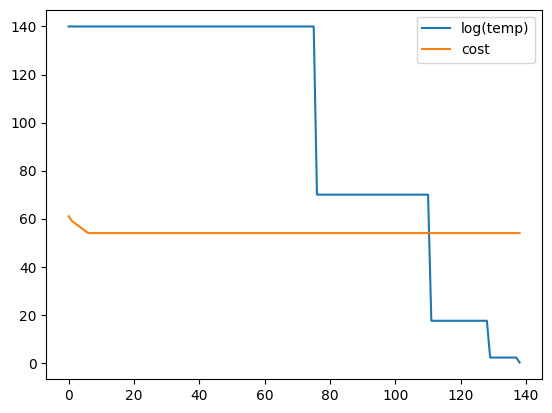

In [5]:
t1 = time()
requests = array(list(map(int ,open("input1.csv").read().split(","))))
stockLength = 1000
solutions , best = simulated_annealing( initial_temp = 5 * len(requests) , temp_length = len(requests)//2 , initial_cooling_rate = 0.5 , initial_solutions = create_initial_solutions( requests , stockLength , len( requests ) // 50 ) , cooling_rate_step = 0.5 , temp_length_step = 0.5 )
print("time(m) =", (time() - t1)/60 )
print(best)
print("number_of_stock=", best.cost)
solutions.plot()
savefig("1.png" , dpi = 300 )

In [6]:
t1 = time()
requests = array(list(map(int ,open("input2.csv").read().split(","))))
stockLength = 5600
solutions , best = simulated_annealing( initial_temp = 5 * len(requests) , temp_length = len(requests)//2 , initial_cooling_rate = 0.5 , initial_solutions = create_initial_solutions( requests , stockLength , len( requests ) // 50 ) , cooling_rate_step = 0.5 , temp_length_step = 0.5 )
print("time(m) =", (time() - t1)/60 )
print(best)
print("number_of_stock=", best.cost)
solutions.plot()
savefig("2.png" , dpi = 300 )

initial best cost is 88
new best cost is 87
total best cost is 87
 log temp is 1095
new best cost is 86
total best cost is 86
 log temp is 1095
new best cost is 85
total best cost is 85
 log temp is 1095


KeyboardInterrupt: ignored

In [ ]:
t1 = time() 
requests = array(list(map(int ,open("input3.csv").read().split(","))))
stockLength = 500
solutions , best = simulated_annealing( initial_temp = 5 * len(requests) , temp_length = len(requests)//2 , initial_cooling_rate = 0.5 , initial_solutions = create_initial_solutions( requests , stockLength , len( requests ) // 50 ) , cooling_rate_step = 0.5 , temp_length_step = 0.5 )
print("time(m) =", (time() - t1)/60 )
print(best)
print("number_of_stock=", best.cost)
solutions.plot()
savefig("3.png" , dpi = 300 )

In [ ]:
t1 = time()
requests = array(list(map(int ,open("input4.csv").read().split(","))))
stockLength = 100
solutions , best = simulated_annealing( initial_temp = 5 * len(requests) , temp_length = len(requests)//2 , initial_cooling_rate = 0.5 , initial_solutions = create_initial_solutions( requests , stockLength , len( requests ) // 50 ) , cooling_rate_step = 0.5 , temp_length_step = 0.5 )
print("time(m) =", (time() - t1)/60 )
print(best)
print("number_of_stock=", best.cost)
solutions.plot()
savefig("4.png" , dpi = 300)